<a name="1"></a>
# Sequence Storage in Tournament-Based Structures
This code simulates the proposed sequence storage models and retrieval algorithms that introduced in the paper below that is submitted to the [Neural Computation](https://www.mitpressjournals.org/loi/neco):

**Mofrad, A. A., Mofrad, S. A. Yazidi, A., & Parker, M. G.  (2021). On Neural Associative Memory Structures: Storage and Retrieval of Sequences in a Chain of  Tournaments .**

The structures are based on the original work by [Jiang et. al (2016)](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7114322) that deals with the problem of storing then retrieving sequences in sparse binary neural networks.

<a name="1"></a>
## Part 1:  Import libraries and classes and initializations

- Let's import libraries and the classes and do initializations

In [1]:
import numpy as np
import pickle
import time
import os 
import sys

# dataset git repo
if not os.path.exists("Tournament-Based-Sequence-Storage"):
  !git clone https://github.com/Asieh-A-Mofrad/Tournament-Based-Sequence-Storage.git

Path = '/content/Tournament-Based-Sequence-Storage/'
sys.path.insert(0, Path)

import Tournament_basis as Tour

Cloning into 'Tournament-Based-Sequence-Storage'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 39 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), done.


### Configuration of Initial values
- `c`: is the number of clusters in the model
- `k`: is the required bits to represent a sub-sequence (component). The number of (nodes) neurons in a cluster equals l=2<sup>k</sup>.
- `L`: the length of sequence (number of components)
- `r`: forward output edges from each active neuron.
- `r_fdbk`: the size of backward edges from each active neuron. Applicable in `Tournament_Feedback_Winner` and `Tournament_Backward_Winner`. 
- `r_explore`: The number of clusters which is used for exploration.  Applicable in `Tournament_Explore_Winner`. `r_explore` must be less than `r-1`.
- `Num_Seq`: is a list of integers as the size of learning set in simulations.
- `Iter`: The number of repetition of retrieval (the error is an average over errors in retrieving `Iter` randomly selected sequences from the learning set)

In [2]:
def Simulation_parameters(structure_ID):
    """
    Here the information for the simulation will be provided. 
    """
    memory_type = {1 : 'Tournament_Winner', 
                   2 : 'Tournament_Cache_Winner',
                   3 : 'Tournament_Explore_Winner',
                   4 : 'Tournament_Feedback_Winner',
                   5 : 'Tournament_Backward_Winner'
        }
    Initial_values = { 
            1: {
                ### Change the Parameters with your values ###
                'memory_type' : memory_type[structure_ID], 
                'c' : 20,
                'k' : 8,
                'L' : 100,
                'r' : 12, # total. The size of tournament is r + 1
                'r_fdbk' : 6, # c >= 2*r - r_fdbk +1
                'r_explore' : 7, # r_explore < r-1
                'Num_Seq': np.linspace(10, 15000, 20, dtype = int),
                'Iter' : 50
                    },
            ### You can add new items with an integer ('result_no') as the key ###  
            }
    return Initial_values


<a name="1"></a>
## Part 2:  Choose the structure

- `result_no`  is used to assign a set of parameters initial values in `initialization.py`  and is used for saving the output

- `structure_ID` is a number between 1-5 that determines the memory and retrieval setting  

- The results will be saved in a pickle file in the "results" folder.

- Results of a previously simulated data can be accessed by its filename.

- `Learning_set_flag` must be set `True` in the case that there is no Learning set for the chosen initial values, or one want to generate a new learning set. Otherwise, it is `False`.
To see the results for a previous simulation, change `file_name= None` to a file name in the results folder, say `file_name = 'results/Tournament_Winner_2_100.p'` 

In [5]:
# You can change the valuses in this cell
result_no = 1 # currently it is the only valid 'key'. 
structure_ID = 5  # Change the ID to choose a different structure. Options are 1, 2, 3, 4 and 5
file_name = None  # Give the file_name to just plot a previousely saved simulation
Learning_set_flag = True # change it to False if the learning set is generated in a previous run

#file_name = Path + 'results/Tournament_Winner_2_100.p'

<a name="1"></a>
## Part 3: Run the main code
Now run the below cell to see the results.

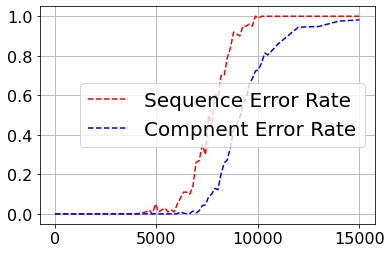


 **SER results** 

{10: 0.0, 1007: 0.0, 2005: 0.0, 3002: 0.0, 4000: 0.0, 4500: 0.01, 4653: 0.02, 4807: 0.0, 4961: 0.05, 5115: 0.01, 5269: 0.02, 5423: 0.03, 5576: 0.01, 5730: 0.02, 5884: 0.01, 6038: 0.05, 6192: 0.08, 6346: 0.11, 6500: 0.11, 6653: 0.1, 6807: 0.14, 6961: 0.26, 7115: 0.27, 7269: 0.35, 7423: 0.3, 7576: 0.5, 7730: 0.44, 7884: 0.61, 8038: 0.58, 8192: 0.7, 8346: 0.7, 8500: 0.79, 8653: 0.84, 8807: 0.92, 8961: 0.91, 9115: 0.9, 9269: 0.95, 9423: 0.95, 9576: 0.96, 9730: 0.95, 9884: 1.0, 10038: 0.99, 10192: 1.0, 10346: 1.0, 10500: 1.0, 11000: 1.0, 12000: 1.0, 13000: 1.0, 14000: 1.0, 15000: 1.0}

 **CER results** 

{10: 0.0, 1007: 0.0, 2005: 0.0, 3002: 0.0, 4000: 0.0, 4500: 0.00011363636363636364, 4653: 0.00022727272727272727, 4807: 0.0, 4961: 0.0005681818181818182, 5115: 0.00011363636363636364, 5269: 0.00034090909090909094, 5423: 0.00034090909090909094, 5576: 0.00011363636363636364, 5730: 0.00022727272727272727, 5884: 0.00011363636363636364, 6038: 0.0007954545454545455, 6192: 0.01

In [6]:
# Don't Change this cell. 
%matplotlib inline 

def Initialization(result_no, structure_ID):
    Initial_values = Simulation_parameters(structure_ID)
    return Initial_values[result_no]

if file_name == None:
    parameter = Initialization(result_no, structure_ID)
    general_memory = Tour.Tournumant(parameter)
    Memory = general_memory.tournament
    if Learning_set_flag: 
        Learning_set = Memory.Learning_Set_Generator()
        pickle.dump(Learning_set, open( f'results/Learning_set_basis_{result_no}.p', "wb" ))
        Testing_index = Memory.Testing_set_Generator()
        pickle.dump(Testing_index, open( f'results/Testing_set_basis_{result_no}.p', "wb" ))

    Start = time.time()
    Memory.Test_Retrieval(result_no)
    Duration = time.time()-Start
    print('\n---------------\n execution time', Duration)

    file_name = f'results/{parameter["memory_type"]}_{result_no}_{parameter["Iter"]}.p'
    print('results are saved in', file_name)

Tour.Plot_Results(file_name).Plot_Error()

## License

MIT license (MIT-LICENSE or http://opensource.org/licenses/MIT)